In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
plt.style.use('ggplot')
sns.set_palette("pastel")

# **Introduction to Advanced Programming - Final Project**

## **Phase 1: Bussiness Understanding**

##### Business Question No.1.
**Is it possible to predict the flight price of a domestic flight in India based on the route, airline or date?**

>The question is SMART:
> * Specific - there are specific criteria by which we are required to predict the price of the flight.
> * Measurable - the question has a distinct answer, whether the price can be predicted or not.
> * Assignable - the necessary resources are available, we will use the Classification model.
> * Realistic - there is a clear understanding of how the objective might be reached, as the data is based on real domestic flight in India between March and June of 2019.
> * Time-Related - there is a clear deadline by which the outcome must be achieved.

##### Business Question No.2.
**How many groups can the flights be divided so that in each group there will be flights that are similar in terms of airline, origin, destination and price?**

>The question is SMART:
> * Specific - there are specific criteria by which we are required to explore the flights.
> * Measurable - the question has a distinct answer, the number of groups.
> * Assignable - the necessary resources are available, we will use the Clustering model.
> * Realistic - there is a clear understanding of how the objective might be reached, as the data is based on real domestic flight in India between March and June of 2019.
> * Time-Related - there is a clear deadline by which the outcome must be achieved.

##### Introduction:
The airlines in India are fueled by the fast growing business of the Civil Aviation in India. As of November 2018, India's domestic airline market is ranked as the third largest in the world and is expected to reach top rank in the next 10 to 15 years. A lot of this is credited to the increase in competition among the domestic carriers in India.

##### Problem Statement
Prices for airline tickets are as unpredictable as British weather. A price for the same seat may change several times in 24 hours. Every transport provider is trying to sell as much inventory as possible and at the maximum price. Traveler demand for flights also depends on seasonality, days and parts of a week, holidays or events. 

Competing for customer's attention, the market players monitor each other’s prices, adjusting their price strategies to be ahead of rivals. Not to mention unique approaches to revenue management and pricing strategies. So, it’s challenging for data analysts to forecast flight prices, because they can’t learn about each company’s pricing strategy or up-to-date information about their inventory or real demand for specific dates. Despite difficulties, specialists find solutions by using algorithm forecasts of future prices based on historical data and machine learning models.

Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities in India. 

The training set consists of 10,014 records and the test set consists of 3,339 records.

##### Features
* **Airline:** The name of the airline.
* **Date:** The date of the journey
* **Source:** The source from which the service begins.
* **Destination:** The destination where the service ends.
* **Route:** The route taken by the flight to reach the destination.
* **Dep_Time:** The time when the journey starts from the source.
* **Arrival_Time:** Time of arrival at the destination.
* **Duration:** Total duration of the flight.
* **Total_Stops:** Total stops between the source and destination.
* **Additional_Info:** Additional information about the flight
* **Price:** The price of the ticket

## <br>**Phase 2: Data Understanding**

In order to define the hypotheses that will lead this analysis, it is first needed to know which information is available in the dataset (attributes). In this phase the data will be loaded and we will first try to understand the data and the context on which they were collected.<br>

#### **2.1. General Properties**

###### Loading the dataset and printing out a few lines:

In [2]:
try:
    data = pd.read_excel('flights.xlsx')
    print('Loaded.')
except:
    data = None
    print('Error while reading file.')

Loaded.


In [3]:
data.shape

(13354, 11)

In [4]:
data.head()

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,"BLR , DEL",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,"CCU , IXR , BBI , BLR",05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,"DEL , LKO , BOM , COK",09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,"CCU , NAG , BLR",18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,"BLR , NAG , DEL",16:50,21:35,4h 45m,1 stop,No info,13302.0


* The data set consists of 13354 rows and 11 columns.
* The data set contains features with mixed data types.
* The target variable is the only numerical feature in the data set.<br>

###### Reading dataset general information:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date             13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            13354 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


###### <br>Checking of missing values:

In [6]:
data.isna().sum()

Airline            0
Date               0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* All feature data types are object, except the target feature, Price, which is float.
* The dataset has two missing values, one in Route variable and the other in Total_Stops variable.
* Except those, all features have 13,354 instances.<br><br>

#### **2.2. Categorical attributes**

###### Describing the categorical attributes:

In [7]:
data.describe(include=['O'])

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,13354,13354,13354,13354,13353,13354,13354,13354,13353,13354
unique,12,44,5,6,132,223,1451,374,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,"DEL , BOM , COK",18:55,19:00,2h 50m,1 stop,No info
freq,4746,633,5682,5682,3000,288,536,672,7056,10493


* Out of 12 airlines, Jet Airways is the most frequent one, operating about 36% of India's domestic flights.
* The day on which the number of domestic flights in India was the highest was May 18th, 2019.<br>(It might be related to the Indian holiday, Buddha Purnima.)
* Out of 5 sources, most flight take-offs (almost 43%) were from Delhi, which makes it the top source.
* Out of 6 destinations, Cochin is the most common, with about 43% of flight routes ending there.
* More than 50% of the flights have 1 stop.
* Additional_Info feature contains almost 80% No info values.<br>

#### <br>**2.3. Numerical attributes**

###### Describing the numerical attribute:

In [8]:
data.describe()

,Price
count,13354.000000
mean,8190.637282
std,4648.401101
min,3.065912
25%,4804.000000
50%,7308.000000
75%,11087.000000
max,79512.000000


* The average cost of domestic flight ticket in India between the months March and June 2019 was 8190 rupees.
* The maximum and minimum flight ticket prices are far from the mean of this feature. So, probably, there are some outliers among the samples.

## <br>**Phase 3: Data Preparation**

Preparation of data is trailed by breaking down the information, revealing the concealed patterns and afterward applying different models.

In this phase we will proceed to data wrangling and exploratory data analysis in order to draw some conclusions about the subject.
Some operations will be performed to inspect data types, to look for missing values or possibly errant data. Data cleaning operations will be executed in the same section where a specific attribute is being analyzed.

#### **3.1. Data Pre-processing**

We will modify the dataset variables to extract meaningful information in order to capture as much insight as possible, leaving the dataset and its variables ready to be used in our machine learning algorithms.

In [10]:
data.head(3)

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,"BLR , DEL",22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,"CCU , IXR , BBI , BLR",05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,"DEL , LKO , BOM , COK",09:25,04:25 10 Jun,19h,2 stops,No info,13882.0


###### Feature Cleaning

>##### **3.1.1 Dropping Irrelevant Features**
The dataset must contain relevant business information to answer the problem we’re trying to solve. Since we start off with a wide range of variables, we will eliminate the ones that offer no predictive values for the models.

>As mentioned in the categorical attributes description above, Additional_Info contains almost 80% No Info's values. This makes Additional_Info a redundant and noisy feature that is irrelevant in the presence of others, as it offers no predictive values for the models.

In [11]:
def drop_col(df,col):
    df.drop(col, axis=1, inplace=True)

In [12]:
drop_col(data, 'Additional_Info')

In [13]:
data.head(3)

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,"BLR , DEL",22:20,01:10 22 Mar,2h 50m,non-stop,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,"CCU , IXR , BBI , BLR",05:50,13:15,7h 25m,2 stops,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,"DEL , LKO , BOM , COK",09:25,04:25 10 Jun,19h,2 stops,13882.0


###### <br>Feature Engineering

>##### **3.1.2 Handling Missing Data**
>There are various techniques for handling missing values. The most common approach is to simply omit those cases with the missing data and analyze the remaining data. Since there are only two missing datapoints in the dataset, we will delete them.<br>

In [14]:
data[data.isna().any(axis=1)]  

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,7480.0


In [15]:
data.shape

(13354, 10)

In [16]:
data.dropna(inplace=True)

In [17]:
data.isna().sum()

Airline         0
Date            0
Source          0
Destination     0
Route           0
Dep_Time        0
Arrival_Time    0
Duration        0
Total_Stops     0
Price           0
dtype: int64

In [18]:
data.shape

(13353, 10)

> The dataset had one missing value in Route variable and one in Total_Stops variable. The above output shows that the corrections have now been made and there are no more missing values in the dataset.

>##### <br>**3.1.3 Handling Heterogeneous Data Types Features**
>Date-time and mixed variables are a treasure trove of information, with each number corresponding to a specific part of the date and the time. By pre-processing them correctly, we can extract much more information and help our models learn faster and make more accurate predictions.<br>

In [19]:
data.head(3)

,Airline,Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,"BLR , DEL",22:20,01:10 22 Mar,2h 50m,non-stop,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,"CCU , IXR , BBI , BLR",05:50,13:15,7h 25m,2 stops,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,"DEL , LKO , BOM , COK",09:25,04:25 10 Jun,19h,2 stops,13882.0


> Building an ordinal relationship between the date-time values is very challenging for a machine learning algorithm. A model only considers the exact input. It will ‘read’ two dates or hours as two different numbers and will not notice that, for example, the dates are only one day apart or in the same month. These insights must be explicitly given to the model.

In [20]:
data.dtypes

Airline          object
Date             object
Source           object
Destination      object
Route            object
Dep_Time         object
Arrival_Time     object
Duration         object
Total_Stops      object
Price           float64
dtype: object

>The datatype of Date, Dep_Time and Arrival_Time is object and not datetime. So, firstly we will convert it into date and time, so we can extract each number corresponding to a specific part of the date and the time and use it properly for analysis.

In [21]:
def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col], dayfirst=True, infer_datetime_format=True)

In [22]:
for i in ['Date', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [23]:
data.dtypes

Airline                 object
Date            datetime64[ns]
Source                  object
Destination             object
Route                   object
Dep_Time        datetime64[ns]
Arrival_Time    datetime64[ns]
Duration                object
Total_Stops             object
Price                  float64
dtype: object

>* ##### Date
>A few features can be determined from the current feature. For example, flight weekdays and flight months can be issued by the datetime object. Additionally, flight date is important, whether it is on festive day or a weekday or  weekend. Instinctively, the flights planned during weekends cost more than the flights on weekdays.<br>
<br>dt.day method will extract day of month, 1-31.
<br>dt.month method will extract month as a number, 1-12.

In [24]:
data['Flight_Day'] = data.Date.dt.day
data['Flight_Month'] = data.Date.dt.month

In [25]:
drop_col(data, 'Date')

In [26]:
data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Flight_Day,Flight_Month
0,IndiGo,Banglore,New Delhi,"BLR , DEL",2021-07-09 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,3897.0,24,3
1,Air India,Kolkata,Banglore,"CCU , IXR , BBI , BLR",2021-07-09 05:50:00,2021-07-09 13:15:00,7h 25m,2 stops,7662.0,1,5
2,Jet Airways,Delhi,Cochin,"DEL , LKO , BOM , COK",2021-07-09 09:25:00,2021-06-10 04:25:00,19h,2 stops,13882.0,9,6


>* ##### Dep_Time & Arrival_Time
Time components are axtracted into new columns, so we can extract each number corresponding to a specific part of the time and use it properly for analysis.<br>
<br>dt.hour method will extract the hours of the datetime.
<br>dt.minute method will extract the minutes of the datetime.

In [27]:
def extract_hour(data,col):
    data[col+'_Hour'] = data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_Min'] = data[col].dt.minute

In [28]:
for i in ['Dep_Time', 'Arrival_Time']:
    extract_hour(data,i)
    extract_min(data,i)

In [29]:
drop_col(data, ['Dep_Time', 'Arrival_Time'])

In [30]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Flight_Day,Flight_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,"BLR , DEL",2h 50m,non-stop,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,"CCU , IXR , BBI , BLR",7h 25m,2 stops,7662.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,"DEL , LKO , BOM , COK",19h,2 stops,13882.0,9,6,9,25,4,25


>* ##### Duration
Time components are axtracted from the mixed variable in order to compute flight duration (minutes).

In [31]:
def duration_mins(x):
    if len(x.split(' '))!=2:
        return int(x.split(' ')[0][0:-1])*60
    else:
        return int(x.split(' ')[0][0:-1])*60 + int(x.split(' ')[1][0:-1])

In [32]:
data['Duration'] = data.Duration.apply(duration_mins)

In [33]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Flight_Day,Flight_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,"BLR , DEL",170,non-stop,3897.0,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,"CCU , IXR , BBI , BLR",445,2 stops,7662.0,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,"DEL , LKO , BOM , COK",1140,2 stops,13882.0,9,6,9,25,4,25


>* ##### Total_Stops
The data in this feature falls into categories, but the numbers placed on the categories have meaning. Therefore, we will perform ordinal encoding by assigning integers to the labels in the order they are observed in the data.

In [34]:
data.Total_Stops.value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [35]:
data.Total_Stops.replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [36]:
data.Total_Stops.value_counts()

1    7056
0    4340
2    1899
3      56
4       2
Name: Total_Stops, dtype: int64

>##### <br>**3.1.4 Handling Categorigal Features**<br>

In [37]:
categorical = data.select_dtypes(include='object')
categorical.head(3)

,Airline,Source,Destination,Route
0,IndiGo,Banglore,New Delhi,"BLR , DEL"
1,Air India,Kolkata,Banglore,"CCU , IXR , BBI , BLR"
2,Jet Airways,Delhi,Cochin,"DEL , LKO , BOM , COK"


>* ##### Airline

In [38]:
data.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

> Binning means sacrificing information and making the data more regularized. The main motivation of binning is to make the model more robust and prevent overfitting, however, it has a cost to the performance. The trade-off between performance and overfitting is the key point of the binning process. <br>For numerical columns (except for some obvious overfitting cases), binning might be redundant, due to its effect on model performance. However, for categorical columns, assigning a general category to the labels with low frequencies helps to keep the robustness of the model. In this case, we will assign the business and premium classes to their corresponding airlines category and Trujet airline to Multiple Carriers.

In [39]:
data['Airline'] = data.Airline.replace({'Jet Airways Business': 'Jet Airways',
                                        'Multiple carriers': 'Multiple Carriers',
                                        'Multiple carriers Premium economy': 'Multiple Carriers',
                                        'Vistara Premium economy': 'Vistara',
                                        'Trujet': 'Multiple Carriers'})

In [40]:
data.Airline.value_counts()

Jet Airways          4754
IndiGo               2564
Air India            2191
Multiple Carriers    1560
SpiceJet             1026
Vistara               613
Air Asia              405
GoAir                 240
Name: Airline, dtype: int64

>* ##### Source

In [41]:
data.Source.value_counts()

Delhi       5681
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

>* ##### Destination
Both New Delhi and Delhi are destined to Delhi's airport, as the nearest airport to New Delhi is Delhi. Therefore, we will assign New Delhi to Delhi.

In [42]:
data.Destination.value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [43]:
data['Destination'] = data.Destination.replace({'New Delhi': 'Delhi'})

In [44]:
data.Destination.value_counts()

Cochin       5681
Banglore     3581
Delhi        2752
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

>* ##### Route

In [45]:
data.Route.value_counts()

DEL , BOM , COK                3000
BLR , DEL                      1941
CCU , BOM , BLR                1232
CCU , BLR                       896
BOM , HYD                       785
                               ... 
CCU , RPR , HYD , BLR             1
BLR , HBX , BOM , AMD , DEL       1
CCU , IXA , BLR                   1
BOM , UDR , DEL , HYD             1
BOM , NDC , HYD                   1
Name: Route, Length: 132, dtype: int64

>This feature has a high cardinality, meaning it has many distinct values (132).<br>Despite their potential of being very predictive, high cardinality variables are typically discarded in predictive modeling.
Including such attributes by standard dummy encoding increases the dimensionality of the data to such an extent that sometimes either the classification technique is unable to process them (with for example decision trees). 

>We will perform Frequency Encoding, which is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat to the target variable, it helps the model understand and assign the weight in direct and inverse proportion, depending on the nature of the data.

In [46]:
fe = data.groupby('Route').size()/len(data)
data.loc[:, 'Route_Freq'] = data.Route.map(fe)

In [47]:
drop_col(data, 'Route')

In [48]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Flight_Day,Flight_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Route_Freq
0,IndiGo,Banglore,Delhi,170,0,3897.0,24,3,22,20,1,10,0.145361
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,5,50,13,15,0.000524
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,9,25,4,25,0.003445


>Our data is now clean and ready for a deeper visual exploration.

#### <br><br>**3.2. Exploratory Data Analysis**<br>

> ##### <br>Price<br>

Let us briefly explore the target data by using visualization:

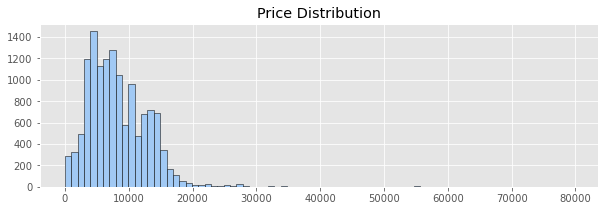

In [49]:
data['Price'].hist(figsize=(10,3), bins=80, ec="k").set_title('Price Distribution');

* The most common price of a domestic flight ticket in India between the months March and June 2019 was between 4,000-5,000 rupees. That's compatiable with the fact that Price histogram is positively skewed, of which the mode is the highest point.

* There are lower picks as the price gets higher, meaning more common prices at the higher price levels. These picks are around 7000 rupees, 10,000 rupees and 14,000. This might be useful for clustering.

* One of the biggest obstacles in predictive modeling can be outliers, which are extreme values that are significantly different from the remaining data. They mislead the training process and lead to inaccurate models. The best way to detect outliers for numerical variables is to demonstrate the data visually. <br>The isolated bars at the right end of the histogram identify outliers. In our case, we can see that there is a small number of flight tickets that cost more than 20,000 rupees. *The outliers will not be handled in this project.*

> ##### <br>Attributes vs. Price<br>

In [50]:
# horizonal graphs annotation
def h_annotate(ax):
    def annotate_single_plot(ax):
        try:
            for a in ax.axes.ravel(): # FacetGrid
                for p in a.patches:
                    _x = p.get_x() + np.nan_to_num(p.get_width(), 0) + 0.4
                    _y = p.get_y() + np.nan_to_num(p.get_height(), 0)
                    value = int(np.nan_to_num(p.get_width(), 0))
                    a.text(_x, _y, value, ha="left")
        except:
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + 0.4
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")
                
    if isinstance(ax, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            annotate_single_plot(ax)
    else:
        annotate_single_plot(ax)

> ##### <br>Categorical Exploration<br>

In [51]:
categorical = data.select_dtypes(include='object')
categorical.head(3)

,Airline,Source,Destination
0,IndiGo,Banglore,Delhi
1,Air India,Kolkata,Banglore
2,Jet Airways,Delhi,Cochin


Let us see how many unique categories are in each categorical feature.

In [52]:
for i in categorical.columns:
    print(f'{i} has total of {data[i].nunique()} categories')

Airline has total of 8 categories
Source has total of 5 categories
Destination has total of 5 categories


> ##### <br>Source-Destination<br>

As both Source and Destination have the same number of unique categories, let us group Destination by Source, so we might discover an interesting connection.

In [53]:
data.groupby('Source')['Destination'].unique().reset_index()

,Source,Destination
0,Banglore,[Delhi]
1,Chennai,[Kolkata]
2,Delhi,[Cochin]
3,Kolkata,[Banglore]
4,Mumbai,[Hyderabad]


>* We can see that each source has a unique final destination, meaning each source has only one final destination the flight can reach to.

Let us create a new column containing the source and its unique destinaion, so we can see it more clearly in our visulas.

In [54]:
data['Source_Dest'] = data.Source.str[:3] + '-' + data.Destination.str[:3]
data[['Source','Destination','Source_Dest']].head()

,Source,Destination,Source_Dest
0,Banglore,Delhi,Ban-Del
1,Kolkata,Banglore,Kol-Ban
2,Delhi,Cochin,Del-Coc
3,Kolkata,Banglore,Kol-Ban
4,Banglore,Delhi,Ban-Del


Let us see which source and destination were the most frequent in India between March and June of 2019.

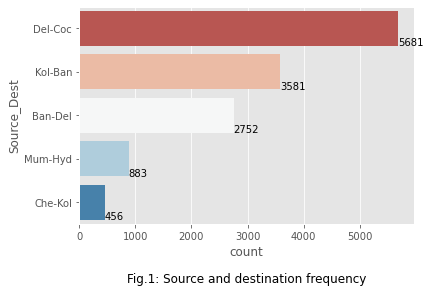

In [55]:
g1 = sns.countplot(y='Source_Dest', data=data, order=data.Source_Dest.value_counts().index, palette='RdBu');
ax = plt.gca()
plt.text(0.5, -0.25, 'Fig.1: Source and destination frequency', fontsize=12, ha='center', va='center', transform=ax.transAxes);
h_annotate(g1);

>* Most domestic flights were from Delhi, followed by Kolkata. Chennai was the source from which the least travelers chose to start their domestic travel. 
>* The most and least popular Destinations were Cochin and Kolkata, respectively.

Let us add hue by month, so we can see a more clear segmentation, per month.

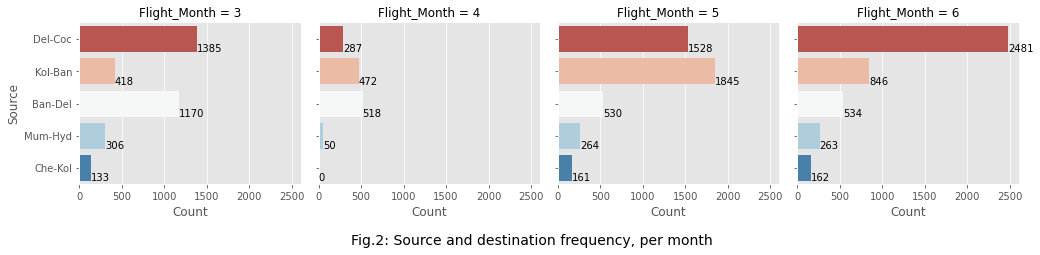

In [56]:
g2 = sns.catplot(y='Source_Dest', kind='count', data=data, order=data.Source_Dest.value_counts().index,
                 col='Flight_Month', height=3, aspect=1.2, palette='RdBu')
g2.set_axis_labels('Count', 'Source')
ax = plt.gca()
plt.text(-1.2, -0.35, 'Fig.2: Source and destination frequency, per month', fontsize=14, ha='center', va='center', transform=ax.transAxes);
h_annotate(g2);

>* On March and June, the most common source and destination were Delhi and Cochin, respectively. In April we noticed a significant drop in the number of flights on this route (and in almost any other route, except Kolkata-Banglore). There might be a reasonable explanation for that, as April marks the beginning of the off-season in India.

>* On April, Kolkata-Banglore route was almost twice more common than Delhi-Cochin. Will be interesting to see if and how it was reflected in the Price.

>* There is a massive growth in Kolkata-Banglore May's flights, compared to the previous months.

>* All 3 other routes appear to handle about the same low number of flights each month, with the exception of Bangalore-Delhi, which performed twice as many flights in March, compared to other months. One possible explanation is that March is considered to be the beginning of the best climate to visit North India. Further, March is the month in which India celebrates the Holi Festival.

Let us group the data by Source, Destination and Flight_Month, so we can see other interesting outcomes based on the main route (source-dist) distributions and their effect (if any) on the price.

In [57]:
src_dst = data.groupby(['Flight_Month','Source_Dest']).agg({'Duration':'mean',
                                                            'Price':'mean'}).reset_index()
src_dst.head(3)

,Flight_Month,Source_Dest,Duration,Price
0,3,Ban-Del,655.521368,10462.782906
1,3,Che-Kol,140.864662,5557.631274
2,3,Del-Coc,861.805054,10050.739093


We can start by exploring the avergae flight price by source and destination, per month.

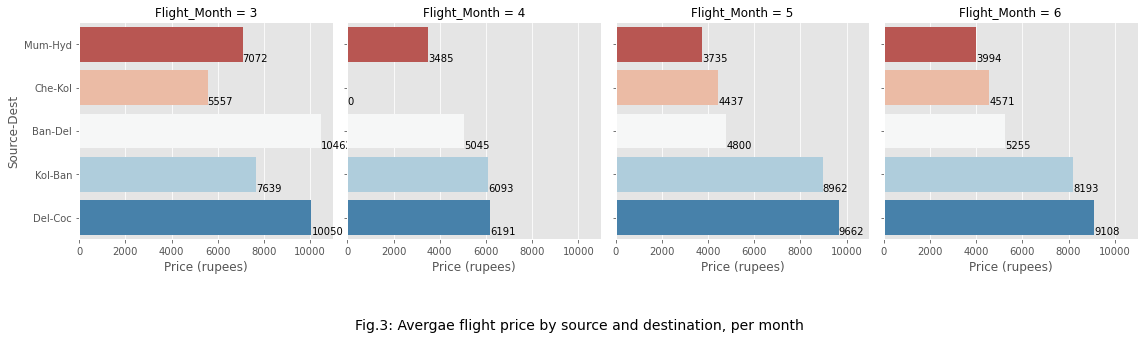

In [58]:
g3 = sns.catplot(x='Price', y='Source_Dest', kind='bar', data=src_dst.sort_values('Price'),
                 col='Flight_Month', height=4, aspect=1, ci=None, palette='RdBu')
g3.set_axis_labels('Price (rupees)', 'Source-Dest')
ax = plt.gca()
plt.text(-1.2, -0.4, 'Fig.3: Avergae flight price by source and destination, per month', fontsize=14, ha='center', va='center', transform=ax.transAxes);
h_annotate(g3);

>* Despite the small number of Delhi-Cochin flights in April, as seen in Fig.1, this route's average Price is still the highest, followed by Kolkata-Banglore. The fact that Kolkata-Banglore's average price is similar to Delhi-Cochin's price when the former performed almost twice the number of Delhi-Cochin's flights might indicate that Cochin's is an essential destination for some people, and a flight might be the most efficient way to reach it. As the airlines are probably familiar with it, they might take advantage of that and raise flight prices.
>* As there were no flights between Chennai to Kolkata on April, the average price of a flight for this source-destination pair is 0.

Let us continue with flight duration per source-destination, per month.

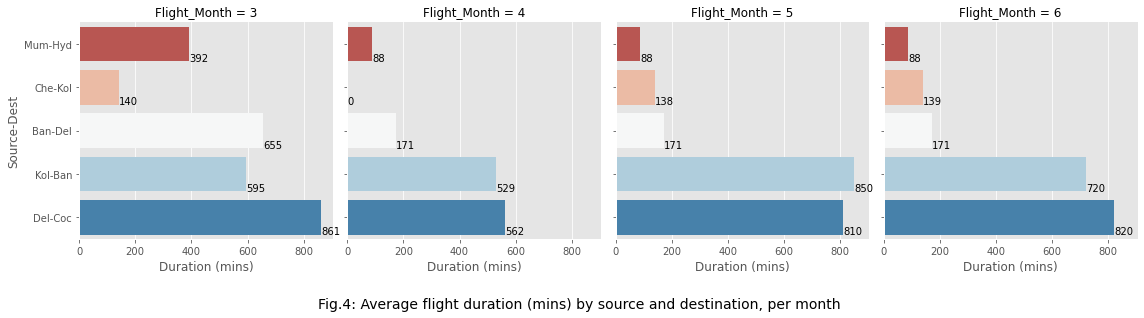

In [59]:
g4 = sns.catplot(x='Duration', y='Source_Dest', kind='bar', data=src_dst.sort_values('Duration'),
                 col='Flight_Month', height=4, aspect=1, ci=None, palette='RdBu')
g4.set_axis_labels('Duration (mins)', 'Source-Dest')
ax = plt.gca()
plt.text(-1.2, -0.3, 'Fig.4: Average flight duration (mins) by source and destination, per month', fontsize=14, ha='center', va='center', transform=ax.transAxes)
h_annotate(g4);

>* Delhi and Cochin are 2000 Kms apart from one another, therefore this route carries long-distance flights, whereas all the others routes are shorter in distance. That is probably the main reason that, on average, Delhi-Couchin flights are the longest.

Let us explore the average flight duration vs. average price based on the source and the destination.

In [60]:
src_dst_dur = data.groupby('Source_Dest').agg({'Duration':'mean',
                                               'Price':'mean'}).reset_index()
src_dst_dur.head(3)

,Source_Dest,Duration,Price
0,Ban-Del,377.378270,7342.358896
1,Che-Kol,139.539474,4811.849750
2,Del-Coc,814.660271,9339.599842


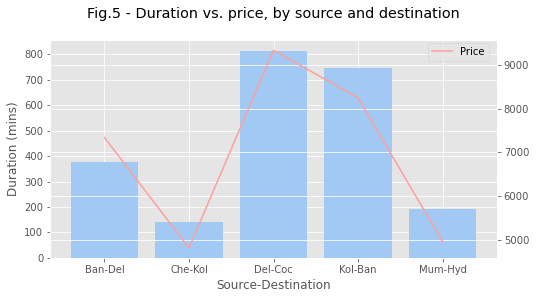

In [61]:
def create_plot(ax, x, y1, y2):
    ax1 = ax
    ax2 = ax1.twinx()

    ax1.bar(x, y1, label='Duration (mins)')
    ax2.plot(x, y2, c="C3", label='Price')

fig = plt.figure(figsize=(8,4))
Fig_5 = fig.add_subplot(111)

Fig_5.set_xlabel('Source-Destination')
Fig_5.set_ylabel(r'Duration (mins)')

create_plot(Fig_5, src_dst_dur.Source_Dest, src_dst_dur.Duration, src_dst_dur.Price)
plt.legend(loc='upper right', bbox_to_anchor=(-1.55,1), fontsize=10, bbox_transform=ax.transAxes)
plt.title('Fig.5 - Duration vs. price, by source and destination\n')
plt.show()

>* There is a positive correlation between average flight duration and price, grouped by source and duration. It only makes sense since we expect that the longer the flight is, the higher the price.

Let us investigate the average number of stops for a flight for each source-destination pair.

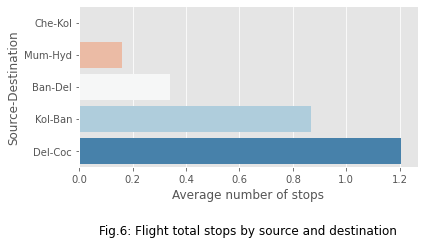

In [62]:
g6 = sns.catplot(x='Total_Stops', y='Source_Dest', kind='bar', height=3, aspect=2, ci=None, palette='RdBu',
                 data=data.groupby('Source_Dest').agg({'Total_Stops':'mean'}).reset_index().sort_values('Total_Stops'))
g6.set_axis_labels('Average number of stops', 'Source-Destination')
ax = plt.gca()
plt.text(0.5, -0.4, 'Fig.6: Flight total stops by source and destination', fontsize=12, ha='center', va='center', transform=ax.transAxes);

>* There are no stops between Chennai and Kolkata, and so we can deduce there are only direct flights for this route.
>* The route with the highest average number of stops is Delhi-Cochin.

Let us compare total stops vs. price, by source and destination.

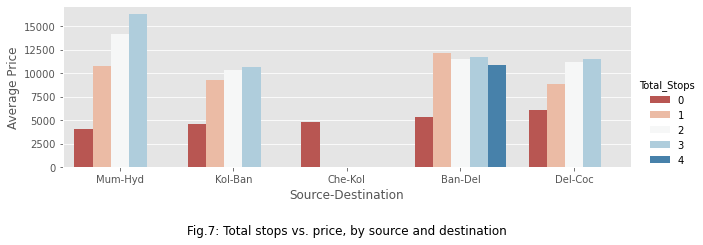

In [63]:
g7 = sns.catplot(y='Price', x='Source_Dest', kind='bar', hue='Total_Stops', height=3, aspect=3, ci=None, palette='RdBu',
                 data=data.groupby(['Source_Dest','Total_Stops']).agg({'Price':'mean'}).reset_index().sort_values('Price'))
g7.set_axis_labels('Source-Destination', 'Average Price')
ax = plt.gca()
plt.text(0.5, -0.4, 'Fig.7: Total stops vs. price, by source and destination', fontsize=12, ha='center', va='center', transform=ax.transAxes);

>* As expected, for each pair of source and destination, flight Prices get higher as there are more stops.

Finaly, let us explore the route frequency vs. price, based on the source and the destination.

In [64]:
src_dst_route = data.groupby('Source_Dest').agg({'Route_Freq':'mean',
                                                 'Price':'mean'}).reset_index()
src_dst_route.head(3)

,Source_Dest,Route_Freq,Price
0,Ban-Del,0.109723,7342.358896
1,Che-Kol,0.034150,4811.849750
2,Del-Coc,0.126244,9339.599842


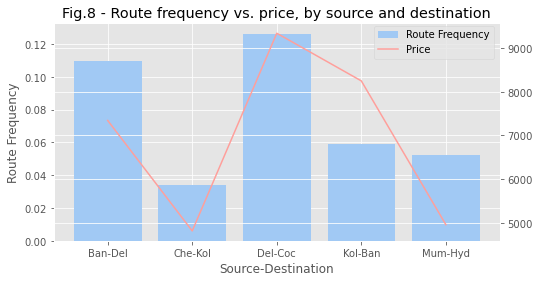

In [65]:
def create_plot(ax, x, y1, y2):
    ax1 = ax
    ax2 = ax1.twinx()

    ax1.bar(x, y1, label='Route Frequency')
    ax2.plot(x, y2, c="C3", label='Price')

fig = plt.figure(figsize=(8,4))
Fig_8 = fig.add_subplot(111)

Fig_8.set_xlabel('Source-Destination')
Fig_8.set_ylabel(r'Route Frequency')

create_plot(Fig_8, src_dst_route.Source_Dest, src_dst_route.Route_Freq, src_dst_route.Price)
fig.legend(loc='upper right', bbox_to_anchor=(0.75,1.35), fontsize=10, bbox_transform=ax.transAxes)
plt.title('Fig.8 - Route frequency vs. price, by source and destination')
plt.show()

>* There is a positive correlation between route frequency and price, grouped by source-destination. This is an important information, as it indicates the possibilty to predict the price based on the route.

> ##### <br>Airline<br>

Let us see which airline handled most domestic flights in India between March and June of 2019.

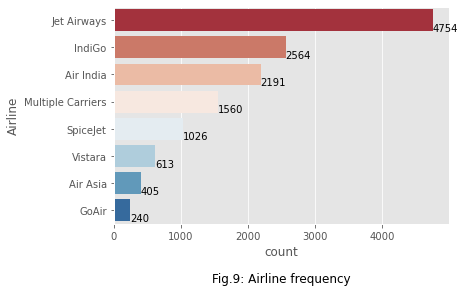

In [66]:
g9 = sns.countplot(y='Airline', data=data, order=data.Airline.value_counts().index, palette='RdBu');
ax = plt.gca()
plt.text(0.5, -0.25, 'Fig.9: Airline frequency', fontsize=12, ha='center', va='center', transform=ax.transAxes);
h_annotate(g9);

>* Jet Airways is the most frequent airline, operating about 36% of India's domestic flights. GoAir is the least frequent airline.

Let us add hue by month, so we can get a more clear segmentation and as a result, more insightful information.

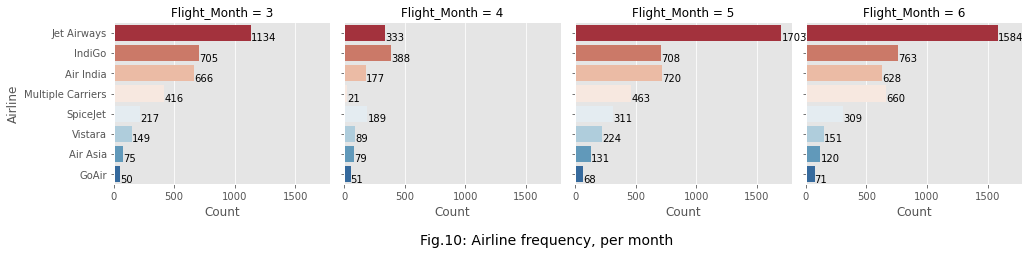

In [67]:
g10 = sns.catplot(y='Airline', kind='count', data=data, order=data.Airline.value_counts().index,
                 col='Flight_Month', height=3, aspect=1.2, palette='RdBu')
g10.set_axis_labels('Count', 'Airline')
ax = plt.gca()
plt.text(-1.2, -0.35, 'Fig.10: Airline frequency, per month', fontsize=14, ha='center', va='center', transform=ax.transAxes);
h_annotate(g10);

>* Airlines frequency ratio stays the same for all airline, each month.
>* During April, the number of domestic flights in India decreases.

Let us investigate the average flight duration by airline, per month.

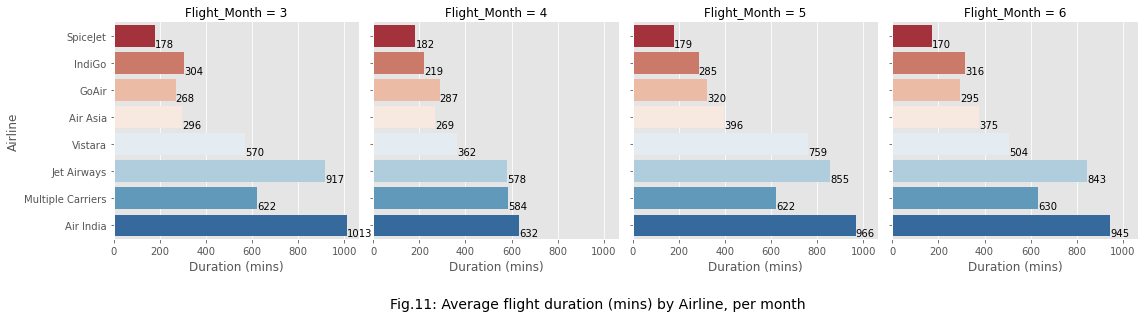

In [68]:
g11 = sns.catplot(x='Duration', y='Airline', kind='bar', col='Flight_Month', height=4, aspect=1, ci=None, palette='RdBu',
                  data=data.groupby(['Flight_Month','Airline']).agg({'Duration':'mean'}).reset_index().sort_values('Duration'))
g11.set_axis_labels('Duration (mins)', 'Airline')
ax = plt.gca()
plt.text(-1.2, -0.3, 'Fig.11: Average flight duration (mins) by Airline, per month', fontsize=14, ha='center', va='center', transform=ax.transAxes)
h_annotate(g11);

>* Each month, Air India airline handles the longest flight travels, followed by Jet Airways airline. Both are in the top 3 most frequent airlines in India, according to Fig.9. We can deduce that these are the most common long distance flight airlines.

>* Indigo is the second most frequent airline in India, by Fig.9. Here we can see that it operates short distance flights, therefore we can deduce that Indigo has cheap flight fares, which makes it a very common low-cost airline.

Let us explore the average number of stops by ailrine, per month.

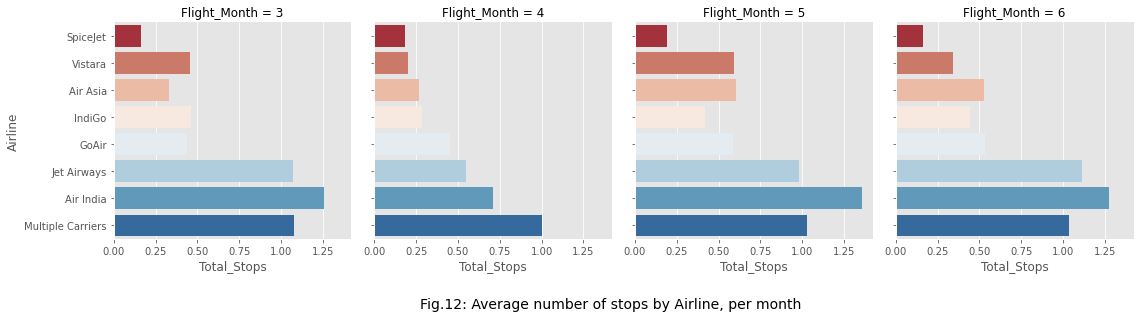

In [69]:
g12 = sns.catplot(x='Total_Stops', y='Airline', kind='bar', col='Flight_Month', height=4, aspect=1, ci=None, palette='RdBu',
                  data=data.groupby(['Flight_Month','Airline']).agg({'Total_Stops':'mean'}).reset_index().sort_values('Total_Stops'))
g12.set_axis_labels('Total_Stops', 'Airline')
ax = plt.gca()
plt.text(-1.2, -0.3, 'Fig.12: Average number of stops by Airline, per month', fontsize=14, ha='center', va='center', transform=ax.transAxes);

>* Fig.12 shows a correlation between Total_Stops and Duration variables, as on average, the more stops there are during a flight, the longer it gets.

Let us explor the average number of stops vs. price by ailrine, per month.

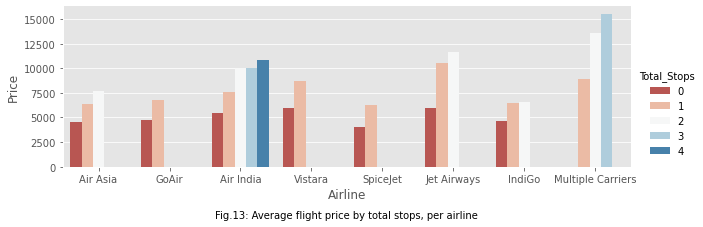

In [70]:
g13 = sns.catplot(x='Airline', y='Price', kind='bar', hue='Total_Stops', height=3, aspect=3, ci=None, palette='RdBu',
                  data=data.groupby(['Flight_Month','Airline','Total_Stops']).agg({'Price':'mean'}).reset_index().sort_values('Total_Stops').sort_values('Total_Stops'))
g13.set_axis_labels('Airline', 'Price')
ax = plt.gca()
plt.text(0.5, -0.3, 'Fig.13: Average flight price by total stops, per airline', fontsize=10, ha='center', va='center', transform=ax.transAxes);

> * All airlines seem to have a positive correlation between flight prices and number of stops, as flight price increases as the number of stops.

>* Air India is the only airlines handles 4 stops domestic flights in India, which might be the reason for its high prices.

Let us show more clearly the correlation between total stop and the price, per airline.

In [71]:
group_by_airline_stops = data.groupby('Airline').agg({'Total_Stops':'mean',
                                                      'Price':'mean'}).reset_index()
group_by_airline_stops.head(3)

,Airline,Total_Stops,Price
0,Air Asia,0.464198,5305.597289
1,Air India,1.249201,8617.130793
2,GoAir,0.512500,5695.356132


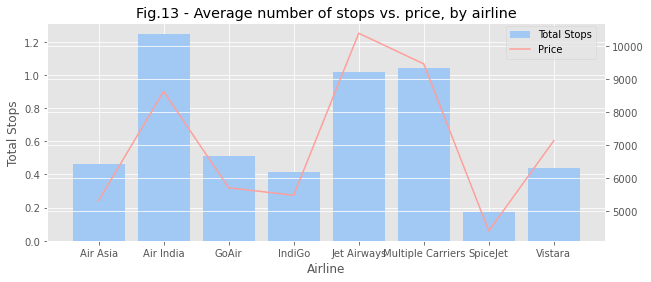

In [72]:
def create_plot(ax, x, y1, y2):
    ax1 = ax
    ax2 = ax1.twinx()

    ax1.bar(x, y1, label='Total Stops')
    ax2.plot(x, y2, c="C3", label='Price')

fig = plt.figure(figsize=(10,4))
Fig_13 = fig.add_subplot(111)

Fig_13.set_xlabel('Airline')
Fig_13.set_ylabel(r'Total Stops')

create_plot(Fig_13, group_by_airline_stops.Airline, group_by_airline_stops.Total_Stops, group_by_airline_stops.Price)
fig.legend(loc='upper right', bbox_to_anchor=(0.93,1.35), bbox_transform=ax.transAxes)
plt.title('Fig.13 - Average number of stops vs. price, by airline')
plt.show()

Finaly, let us explore the route frequency vs. price based on the airline.

In [73]:
group_by_airline_route = data.groupby('Airline').agg({'Route_Freq':'mean',
                                                      'Price':'mean'}).reset_index()
group_by_airline_route.head(3)

,Airline,Route_Freq,Price
0,Air Asia,0.070610,5305.597289
1,Air India,0.043043,8617.130793
2,GoAir,0.131156,5695.356132


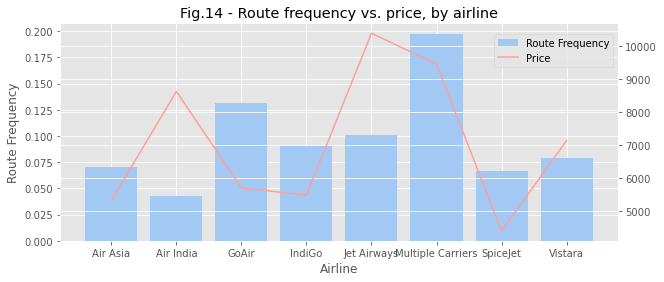

In [74]:
def create_plot(ax, x, y1, y2):
    ax1 = ax
    ax2 = ax1.twinx()

    ax1.bar(x, y1, label='Route Frequency')
    ax2.plot(x, y2, c="C3", label='Price')

fig = plt.figure(figsize=(10,4))
Fig_14 = fig.add_subplot(111)

Fig_14.set_xlabel('Airline')
Fig_14.set_ylabel(r'Route Frequency')

create_plot(Fig_14, group_by_airline_route.Airline, group_by_airline_route.Route_Freq, group_by_airline_route.Price)
fig.legend(loc='upper right', bbox_to_anchor=(0.96,1.3), bbox_transform=ax.transAxes)
plt.title('Fig.14 - Route frequency vs. price, by airline')
plt.show()

Let us explore departure time and arrival time, by airline.
First, we would like to bin those features by different parts of the day, and check if there is a connection between departure or arrival time to the price.

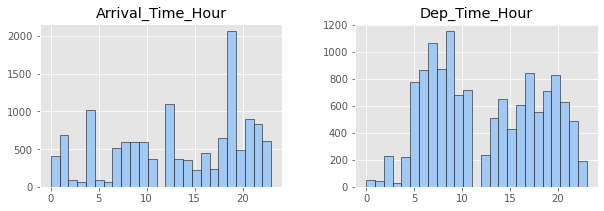

In [75]:
data[['Dep_Time_Hour','Arrival_Time_Hour']].hist(figsize=(10,3), bins=25, ec="k");

Flight time will be considered in classes as:
>* Morning - flights between 5am-12pm.
>* Noon - flights arriving between 1pm-6pm.
>* Evening - flights arriving between 7pm-12am.
>* Overnight - flights arriving between 12am-4am.

In [76]:
data['Dep_Time_Class'] = pd.cut(data.Dep_Time_Hour, bins=[-1,4,12,18,24], labels=['Overnight','Morning','Noon','Evening'])
data['Arr_Time_Class'] = pd.cut(data.Arrival_Time_Hour, bins=[-1,4,12,18,24], labels=['Overnight','Morning','Noon','Evening'])
data[['Dep_Time_Hour','Dep_Time_Class','Arrival_Time_Hour','Arr_Time_Class']].head()

,Dep_Time_Hour,Dep_Time_Class,Arrival_Time_Hour,Arr_Time_Class
0,22,Evening,1,Overnight
1,5,Morning,13,Noon
2,9,Morning,4,Overnight
3,18,Noon,23,Evening
4,16,Noon,21,Evening


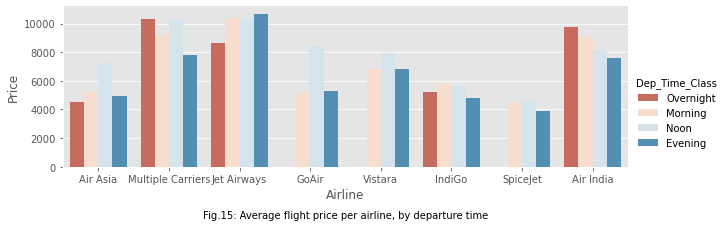

In [77]:
g15 = sns.catplot(x='Airline', y='Price', kind='bar', hue='Dep_Time_Class', height=3, aspect=3, ci=None, palette='RdBu',
                  data=data.groupby(['Airline','Dep_Time_Class']).agg({'Price':'mean'}).reset_index().sort_values('Dep_Time_Class'))
g15.set_axis_labels('Airline', 'Price')
ax = plt.gca()
plt.text(0.5, -0.3, 'Fig.15: Average flight price per airline, by departure time', fontsize=10, ha='center', va='center', transform=ax.transAxes);

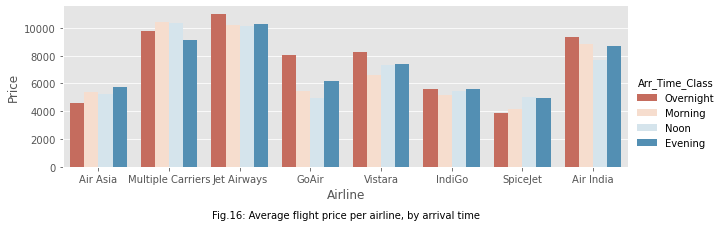

In [78]:
g16 = sns.catplot(x='Airline', y='Price', kind='bar', hue='Arr_Time_Class', height=3, aspect=3, ci=None, palette='RdBu',
                 data=data.groupby(['Airline','Arr_Time_Class']).agg({'Price':'mean'}).reset_index().sort_values('Arr_Time_Class'))
g16.set_axis_labels('Airline', 'Price')
ax = plt.gca()
plt.text(0.5, -0.3, 'Fig.16: Average flight price per airline, by arrival time', fontsize=10, ha='center', va='center', transform=ax.transAxes);

>* The correlation between arrival time and departure time with price is low and inconsistent, as the price changes by no clear trend. This happens as time-related features usually have high cardinality, and therefore they are less important for predicting the price.

Let us drop the new columns we created, as we no longer need them.

In [79]:
drop_col(data,['Source_Dest', 'Dep_Time_Class', 'Arr_Time_Class'])

> ##### <br>Numerical Attributes vs. Price<br>

In [80]:
numerical = data.select_dtypes(exclude='object')
numerical.head(3)

,Duration,Total_Stops,Price,Flight_Day,Flight_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Route_Freq
0,170,0,3897.0,24,3,22,20,1,10,0.145361
1,445,2,7662.0,1,5,5,50,13,15,0.000524
2,1140,2,13882.0,9,6,9,25,4,25,0.003445


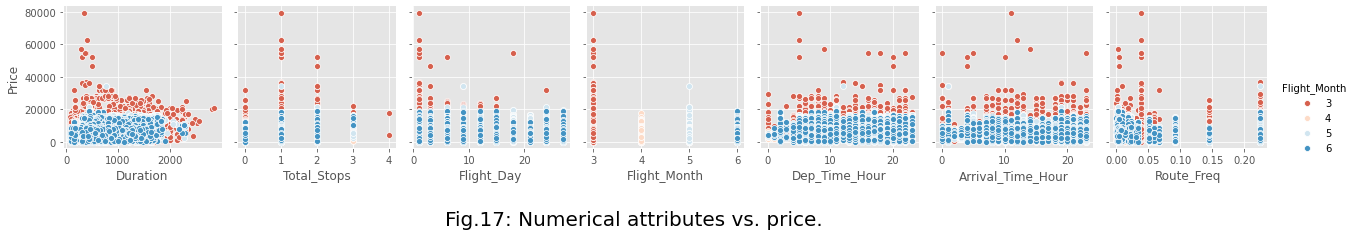

In [81]:
exclude_cols=['Dep_Time_Min','Arrival_Time_Min','Price']
g1=sns.pairplot(data=data, 
                y_vars=['Price'], 
                x_vars=numerical.columns[~numerical.columns.isin(exclude_cols)],
                hue='Flight_Month', palette='RdBu')
ax = plt.gca()
plt.text(-3, -0.5, 'Fig.17: Numerical attributes vs. price.', fontsize=20, ha='center', va='center', transform=ax.transAxes);

<br>
The correlation between Price and each of the numerical variables as a stand-alone is not that clear, but adding a hue by month reveals a clear segmentation. The main conculsion that can be drawn from Fig.1 is that for each of the numerical variables, flight prices were the highest in March. From the business perspective, it is a good starting point, as the first business question success criteria is the possibilty to predict flight prices by date (as well as route and airline, which were explored above).

#### <br>**3.3 Data Preparation**<br>

In [82]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Flight_Day,Flight_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Route_Freq
0,IndiGo,Banglore,Delhi,170,0,3897.0,24,3,22,20,1,10,0.145361
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,5,50,13,15,0.000524
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,9,25,4,25,0.003445


>##### <br>**3.3.1 Data Preparation For Clustreing**<br>

In [83]:
Clustering_Data = data[['Airline','Source','Destination','Price']].copy()
Clustering_Data.head(3)

,Airline,Source,Destination,Price
0,IndiGo,Banglore,Delhi,3897.0
1,Air India,Kolkata,Banglore,7662.0
2,Jet Airways,Delhi,Cochin,13882.0


>###### <br>**One-Hot encoding**
> As Airline, Source and Destination are nominal data, meaning data that are not in any order, we will perform One-Hot encoding by using dummies values approach.

In [84]:
Clustering_Data = pd.get_dummies(Clustering_Data)
Clustering_Data.head(3)

,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple Carriers,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,3897.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,7662.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,13882.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


>###### <br>**Scaling**
> As a continuous feature, Price has a very different scale than the other categorical features. These two characteristics can degrade the predictive performance of the k-Means algorithm, which is a distance based algorithm affected by the scale of the fields. In oreder to make sure that all features vary on comparable scales, we will normalize the data by using min-max normalization.

In [85]:
scaler = MinMaxScaler()
Clustering_Data = pd.DataFrame(scaler.fit_transform(Clustering_Data), columns=Clustering_Data.columns)

In [86]:
Clustering_Data.head(3)

,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple Carriers,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.048975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.096328,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.174558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


>##### <br>**3.3.2 Data Preparation For Classification**<br>

In [87]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Flight_Day,Flight_Month,Dep_Time_Hour,Dep_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Route_Freq
0,IndiGo,Banglore,Delhi,170,0,3897.0,24,3,22,20,1,10,0.145361
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,5,50,13,15,0.000524
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,9,25,4,25,0.003445


>###### <br>**Feature Selection**
>The dataset must contain relevant business information to answer the problem we’re trying to solve. Since there is a wide range of variables, we will eliminate the ones that offer no predictive values for the models.

In [88]:
list(data.columns)

['Airline',
 'Source',
 'Destination',
 'Duration',
 'Total_Stops',
 'Price',
 'Flight_Day',
 'Flight_Month',
 'Dep_Time_Hour',
 'Dep_Time_Min',
 'Arrival_Time_Hour',
 'Arrival_Time_Min',
 'Route_Freq']

Our first business question requires estimating the ability of predicting flight price based on given criteria - airline, date, and route. Extra features can decrease performance because they may “confuse” the model by giving it irrelevant data that prevents it from learning the actual relationships. In addition, reducing the number of features will shorten the run time of the model. As there are highly correlated features in our data and in order to potentially increase performance, we chose the following columns for our model training.

In [89]:
rf_cols=['Airline','Flight_Day','Flight_Month','Route_Freq','Price']
Classification_Data = data[rf_cols].copy()
Classification_Data.head(3)

,Airline,Flight_Day,Flight_Month,Route_Freq,Price
0,IndiGo,24,3,0.145361,3897.0
1,Air India,1,5,0.000524,7662.0
2,Jet Airways,9,6,0.003445,13882.0


>###### <br>**Converting Features**
>We will bin Price variable by assigning integers to price ranges:
<br>Price below 7,000 rupees will be encoded as 1 ('cheap').
<br>Price between 7,000-14,000 rupees will be encoded as 2 ('average').
<br>Price above 14,000 rupees will be encoded as 3 ('expensive').

In [90]:
Classification_Data.loc[Classification_Data['Price']<7000, 'Price'] = 1
Classification_Data.loc[(Classification_Data['Price']>=7000) & (Classification_Data['Price']<=14000), 'Price'] = 2
Classification_Data.loc[Classification_Data['Price']>14000, 'Price'] = 3

>###### <br>**Feature Encoding**
As requested in the assignment, we will perform label encoding on Airline feature by using SciKit learn library.

In [91]:
encoder = LabelEncoder()
Classification_Data['Airline'] = encoder.fit_transform(Classification_Data['Airline'])

In [92]:
Classification_Data.head(3)

,Airline,Flight_Day,Flight_Month,Route_Freq,Price
0,3,24,3,0.145361,1.0
1,1,1,5,0.000524,2.0
2,4,9,6,0.003445,2.0


## <br>**Phase 4: Modeling**

#### <br>**4.1. Clustering**

>##### <br>**4.1.1. K-Means Algorithm**<br>

In [93]:
def k_means(data, k):
    SSE = []
    S_SCORE = []
    K = range(2,k+1)
    for k in K:
        kmeans = KMeans(n_clusters=k, init="k-means++")
        kmeans.fit(data)
        SSE.append(kmeans.inertia_)
        sscore = metrics.silhouette_score(data, kmeans.labels_)
        S_SCORE.append(sscore)
    return pd.DataFrame({'SSE': SSE, 'S_SCORE': S_SCORE}, index=K)

In [94]:
data_measures = k_means(Clustering_Data, 10)

>##### <br>**4.1.2. Elbow Method**<br>

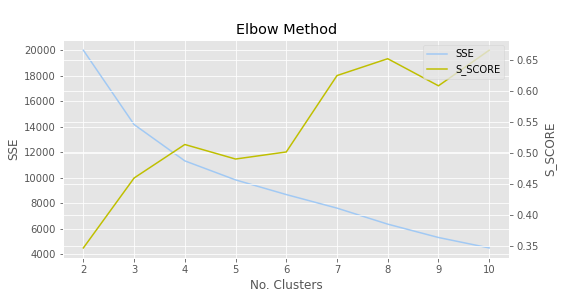

In [95]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.plot(data_measures['SSE'], '-', label='SSE')

ax2 = ax.twinx()
ax2.plot(data_measures['S_SCORE'], '-y', label='S_SCORE')

ax.set_xlabel('No. Clusters')
ax.set_ylabel(r'SSE')
ax2.set_ylabel(r'S_SCORE')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.title('\nElbow Method')
plt.show()

#### <br>**4.2. Classification**

>##### <br>**4.2.1. Random Forest Algorithm**<br>

In [96]:
X = Classification_Data.drop('Price', axis=1)
y = Classification_Data['Price']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [98]:
print(('Train input size: {}, Test input size: {}').format(X_train.shape, X_test.shape))

Train input size: (10014, 4), Test input size: (3339, 4)


In [99]:
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train, y_train);

## <br>**Phase 5: Evaluation**<br>

#### **5.1. Clustering**

>##### <br>**5.1.1. Silhouette Coefficient**<br>

In [100]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(Clustering_Data)
print(f"The Silhouette Coefficient: {metrics.silhouette_score(Clustering_Data, kmeans.labels_):.4f}")

The Silhouette Coefficient: 0.4596


The Silhouette Score is a metric used to calculate the goodness of a clustering technique, meaning how well are the clusters apart from each other and clearly distinguished. <br>The silhouette value falls within the range [-1, 1], when 1 means that the clusters are very dense and nicely separated and 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect. Our Silhouette score is  0.4596, meaning the clusters are nicely separated.<br>Let us explore our clusters in order to see their resemblance.

>##### <br>**5.1.2. Clusters**<br>

In [101]:
Clustering_Data['Cluster'] = kmeans.labels_

In [102]:
Clustering_Data.head(3)

,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple Carriers,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Cluster
0,0.048975,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1,0.096328,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.174558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


<br>Let us shortly explore our clusters using visualization.

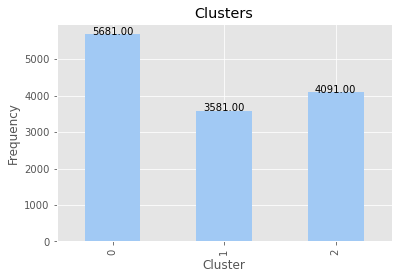

In [103]:
clusters = Clustering_Data.groupby('Cluster').size().plot(kind='bar');
plt.title('Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
for p in clusters.patches:
    clusters.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center');

* Clusters 1 and 2 consist of almost the same number of flights, whereas cluster 0 is the biggest, consists of most flights

> *By Price*

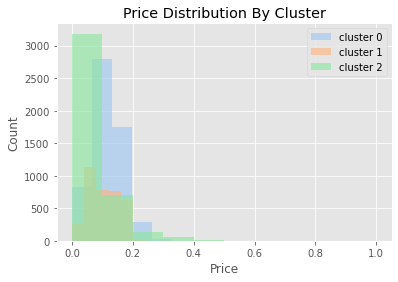

In [104]:
for i in range(3):
    plt.hist(x=Clustering_Data.groupby('Cluster').get_group(i)['Price'], label=f'cluster {i}', alpha=0.65)
plt.title('Price Distribution By Cluster')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend();

* Cluster 2 consists of most flights at price levels of 0-0.1 and at price levels of 0.25 and above.
* Cluster 1 consists of flights at price level ranges between 0 and 0.2.
* Cluster 0 consists of more flights at price levels of 0.1-0.25 than the other clusters.

In [105]:
def clusters_bar_plot(lst,title,xlabel):
    plt.figure(figsize=(7,4))
    for i in range(3):
        plt.bar(x=lst, height=Clustering_Data.groupby('Cluster')[lst].get_group(i).sum(), label=f'cluster {i}', alpha=0.65)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend();

In [106]:
airlines_cols = Clustering_Data.loc[:,Clustering_Data.columns.str.startswith('Airline')].columns
sources_cols = Clustering_Data.loc[:,Clustering_Data.columns.str.startswith('Source')].columns
destinations_cols = Clustering_Data.loc[:,Clustering_Data.columns.str.startswith('Dest')].columns

> *By Airline*

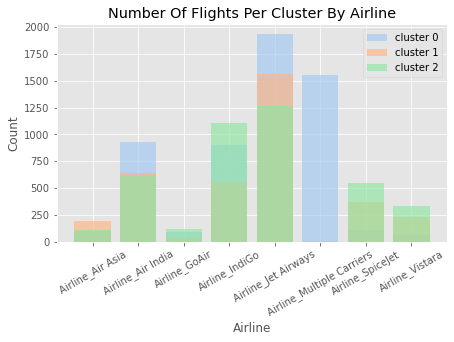

In [107]:
clusters_bar_plot(airlines_cols,'Number Of Flights Per Cluster By Airline','Airline')

* There is no clear segmentation of flights between the clusters based on airlines, as each of them contains flights of several airlines.
* Cluster 1 and cluster 2 consist of flights of all airlines, except Jet Airways.
* Cluster 0 consists of flights handled by all airlines except Air Asia, Spicejet and Vistara.

> *By Source and Destination*

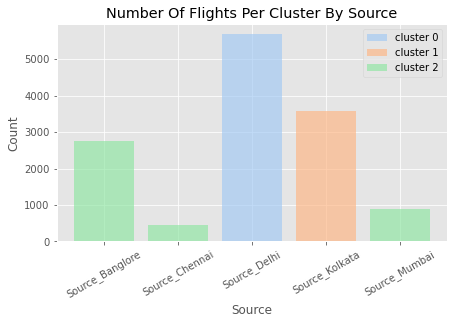

In [108]:
clusters_bar_plot(sources_cols,'Number Of Flights Per Cluster By Source','Source')

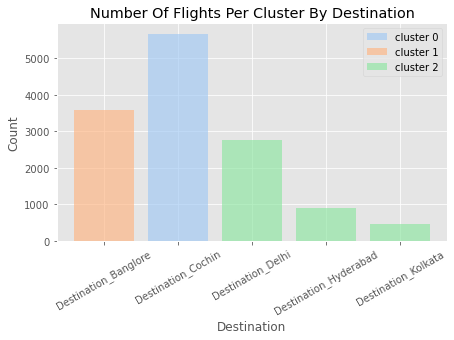

In [109]:
clusters_bar_plot(destinations_cols,'Number Of Flights Per Cluster By Destination','Destination')

* Clearly that the Source and Destination variables are clustered better than Price and Airline variables, as we can see the clear segmentation between the clusters by both source and destination.
* Clusters 0 and 1 consist of flights from only one source and its unique destination (Kolkata-Banglore and Delhi-Cochin, respectively), whereas cluster 2 consists of flights with a total of 3 different sources and their 3 unique destinations.

<br>**Model Evaluation Summary**
>The observations in the dataset can be grouped into 3 clearly distinguishable clusters. Because each observation in the data is a price, airline, source and destination for one flight, we could say that the clusters represent different groups of flights. It’s important to note that we do not have a target variable by which to label these groups, so we do not know exactly what these labels are.

#### <br>**5.2. Classification**

>##### <br>**5.2.1. Accuracy**<br>

In [110]:
def print_confusion_matrix(y_test, y_pred):
    confusion_matrix_ = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(2.5,2.5))
    sns.heatmap(confusion_matrix_, cbar=False, annot=True, square=True, fmt='.0f', cmap=plt.cm.Blues, linewidths=0, linecolor='black', vmin=0)
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.title("\nConfusion Matrix\n")
    plt.show()
    print(f"\nAccuracy: {metrics.accuracy_score(y_test, y_pred):.4f}\n") 
    return

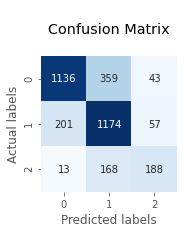


Accuracy: 0.7481



In [111]:
y_pred = rf.predict(X_test)
print_confusion_matrix(y_test, y_pred)

In [112]:
print(f'Confusion matrix makes it easy for us to see what kind of confusions occur in our classification algorithm.\n\nLet us explain shortly about this confusion matrix: The first row are the actual cheap flights. The model predicted {metrics.confusion_matrix(y_test, y_pred).ravel()[0]} of these correctly, and incorrectly predicted {metrics.confusion_matrix(y_test, y_pred).ravel()[1]} of the cheap flights to be an average price flights and {metrics.confusion_matrix(y_test, y_pred).ravel()[2]} of the cheap flights to be expensive flights.\n\nLooking at the cheap flights column, of the {metrics.confusion_matrix(y_test, y_pred).ravel()[0]+metrics.confusion_matrix(y_test, y_pred).ravel()[3]+metrics.confusion_matrix(y_test, y_pred).ravel()[6]} cheap flights predicted by the model (sum of column 0), {metrics.confusion_matrix(y_test, y_pred).ravel()[0]} were actually cheap flights, while {metrics.confusion_matrix(y_test, y_pred).ravel()[3]} were average price flights incorrectly predicted to be cheap flights and {metrics.confusion_matrix(y_test, y_pred).ravel()[6]} were expensive flights incorrectly predicted to be cheap flights.')

Confusion matrix makes it easy for us to see what kind of confusions occur in our classification algorithm.

Let us explain shortly about this confusion matrix: The first row are the actual cheap flights. The model predicted 1136 of these correctly, and incorrectly predicted 359 of the cheap flights to be an average price flights and 43 of the cheap flights to be expensive flights.

Looking at the cheap flights column, of the 1350 cheap flights predicted by the model (sum of column 0), 1136 were actually cheap flights, while 201 were average price flights incorrectly predicted to be cheap flights and 13 were expensive flights incorrectly predicted to be cheap flights.


>##### <br>**5.2.2. Feature Importance**<br>

In [113]:
importances = pd.DataFrame({'Random Forest': rf.feature_importances_}, index=X.columns)

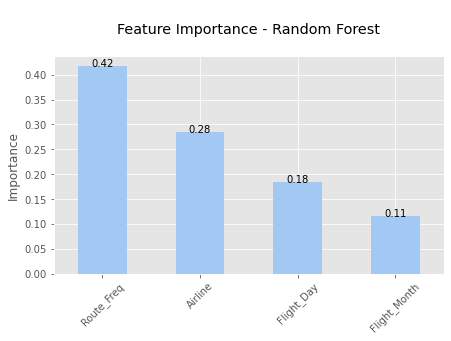

In [114]:
imp = importances.sort_values('Random Forest', ascending=False).plot.bar(figsize=(7, 4), title='\nFeature Importance - Random Forest\n', legend=False)
imp.set_xticklabels(imp.get_xticklabels(), rotation=45)
imp.set_ylabel('Importance')

for p in imp.patches:
    imp.annotate(f'{p.get_height():0.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center');

**Model Evaluation Summary**
>Our model has learned how to predict the price of a domestic flight in India with 74.81% accuracy, from 4 months of historical data. In order to quantify the usefulness of all the variables in the random forest, we can look at the relative importances of the variables. The importances returned represent how much including a particular variable improves the prediction. According to our model, route frequency is the most important variable and the best predictor of a flight price in India. The second most important factor is airline, followed by flight day and flight month.

## <br>**Phase 6: Final Report**<br>

##### Data Understanding
* The data set consists of 13354 rows and 11 columns.
* The data set contains features with mixed data types.
* The target variable is the only numerical feature in the data set.
* All feature data types are object, except the target feature, Price, which is float.
* The dataset has two missing values, one in Route variable and the other in Total_Stops variable.
* Out of 12 airlines, Jet Airways is the most frequent one, operating about 36% of India's domestic flights.
* The day on which the number of domestic flights in India was the highest was May 18th, 2019.<br>(It might be related to the Indian holiday, Buddha Purnima.)
* Out of 5 sources, most flight take-offs (almost 43%) were from Delhi, which makes it the top source.
* Out of 6 destinations, Cochin is the most common, with about 43% of flight routes ending there.
* More than 50% of the flights have 1 stop.
* Additional_Info feature contains almost 80% No info values.
* The average cost of domestic flight ticket in India between the months March and June 2019 was 8190 rupees.
* The maximum and minimum flight ticket prices are far from the mean of this feature. So, probably, there are some outliers among the samples.
***
##### Exploratory Data Analysis

>*Price*
* The most common price of a domestic flight ticket in India between the months March and June 2019 was between 4,000-5,000 rupees.
* There are more common prices at the higher price levels - around 7000 rupees, 10,000 rupees and 14,000.
* One of the biggest obstacles in predictive modeling can be outliers, which are extreme values that are significantly different from the remaining data. They mislead the training process and lead to inaccurate models. There is a small number of flight tickets that cost more than 20,000 rupees. *Outliers will not be handled in this project.*

> *Source-Destination vs. Numerical Attributes*
* Each source has a unique final destination, meaning each source has only one final destination the flight can reach to.
* Most domestic flights were from Delhi, followed by Kolkata. Chennai was the source from which the least travelers chose to start their domestic travel. 
* The most and least popular Destinations were Cochin and Kolkata, respectively.
* On March and June of 2019, the most common source and destination were Delhi and Cochin, respectively. In April we noticed a significant drop in the number of flights on this route (and in almost any other route, except Kolkata-Banglore). There might be a reasonable explanation for that, as April marks the beginning of the off-season in India.
* On April, Kolkata-Banglore route was almost twice more common than Delhi-Cochin. Will be interesting to see if and how it was reflected in the Price.
* There is a massive growth in Kolkata-Banglore May's flights, compared to the previous months.
* All 3 other routes appear to handle about the same low number of flights each month, with the exception of Bangalore-Delhi, which performed twice as many flights in March, compared to other months. One possible explanation is that March is considered to be the beginning of the best climate to visit North India. Further, March is the month in which India celebrates the Holi Festival.
* Despite the small number of Delhi-Cochin flights in April, as seen in Fig.1, this route's average Price is still the highest, followed by Kolkata-Banglore. The fact that Kolkata-Banglore's average price is similar to Delhi-Cochin's price when the former performed almost twice the number of Delhi-Cochin's flights might indicate that Cochin's is an essential destination for some people, and a flight might be the most efficient way to reach it. As the airlines are probably familiar with it, they might take advantage of that and raise flight prices.
* As there were no flights between Chennai to Kolkata on April, the average price of a flight for this source-destination pair is 0.
* Delhi and Cochin are 2000 Kms apart from one another, therefore this route carries long-distance flights, whereas all the others routes are shorter in distance. That is probably the main reason that, on average, Delhi-Couchin flights are the longest.
* There is a positive correlation between average flight duration and price, grouped by source and duration. It only makes sense since we expect that the longer the flight is, the higher the price.
* There are no stops between Chennai and Kolkata, and so we can deduce there are only direct flights for this route.
* The route with the highest average number of stops is Delhi-Cochin.
* For each pair of source and destination, flight Prices get higher as there are more stops.
* There is a positive correlation between route frequency and price, grouped by source-destination. This is an important information, as it indicates the possibilty to predict the price based on the route.

> *Airline vs. Numerical Attributes*
* Jet Airways is the most frequent airline, operating about 36% of India's domestic flights. GoAir is the least frequent airline.
* Airlines frequency ratio stays the same for all airline, each month.
* During April, the number of domestic flights in India decreases.
* Each month, Air India airline handles the longest flight travels, followed by Jet Airways airline. Both are in the top 3 most frequent airlines in India, according to Fig.9. We can deduce that these are the most common long distance flight airlines.
* Indigo is the second most frequent airline in India, by Fig.9. Here we can see that it operates short distance flights, therefore we can deduce that Indigo has cheap flight fares, which makes it a very common low-cost airline.
* Fig.12 shows a correlation between Total_Stops and Duration variables, as on average, the more stops there are during a flight, the longer it gets.
* All airlines seem to have a positive correlation between flight prices and number of stops, as flight price increases as the number of stops.
* Air India is the only airlines handles 4 stops domestic flights in India, which might be the reason for its high prices.
* The correlation between arrival time and departure times with price is low and inconsistent, as the price changes by no clear trend. This happens as time-related features usually have high cardinality, and therefore they are less important for predicting the price.

> *Numerical Attributes vs. Price*
* The correlation between Price and each of the numerical variables as a stand-alone is not that clear, but adding a hue by month reveals a clear segmentation. The main conculsion that can be drawn from Fig.1 is that for each of the numerical variables, flight prices were the highest in March. From the business perspective, it is a good starting point, as the first business question success criteria is the possibilty to predict flight prices by date (as well as route and airline, which were explored above).
***
##### Data Evaluation

>*Business Question No. 1 - Classification (Random Forest)*

Our model has learned how to predict the price of a domestic flight in India with 74.81% accuracy, from 4 months of historical data. In order to quantify the usefulness of all the variables in the random forest, we can look at the relative importances of the variables. The importances returned represent how much including a particular variable improves the prediction. According to our model, route frequency is the most important variable and the best predictor of a flight price in India. The second most important factor is airline, followed by flight day and flight month.

>*Business Question No. 2 - Clustering (K-Means)*

The observations in the dataset can be grouped into 3 clearly distinguishable clusters. Because each observation in the data is a price, airline, source and destination for one flight, we could say that the clusters represent different groups of flights. It’s important to note that we do not have a target variable by which to label these groups, so we do not know exactly what these labels are.